<div style="border:2px solid #422e13; border-radius:30px;  background:#fhffff;">
    <div style="padding:10px 10px 10px 0px; margin:5px; border-radius:23px; background : #20B2AA ; text-align:center;">
        <span style="font-family:sans-serif; font-size:40px; color:#fff;">RiceLeaf disease detection ✅️</span>
    </div>
</div>

<div style="border:1px solid blue; border-radius:10px; padding:2px">
    <img src="https://cdn.britannica.com/89/140889-050-EC3F00BF/Ripening-heads-rice-Oryza-sativa.jpg" width="100%">
</div>
<div style="padding:4px">
    
### <span style='background:yellow;color:#000000;'>Problem statement of the project:</span>

    
**Rice is one of the staple foods worldwide. Rice is mostly cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss.**
**Most common rice leaf disease are Bacterial leaf blight, Brown spot, Leaf smut.**

**Bacterial leaf blight: Bacterial blight is caused by Xanthomonas oryzae pv. oryzae. It causes wilting of seedlings and yellowing and drying of leaves. The disease is most likely to develop in areas that have weeds and stubbles of infected plants. It can occur in both tropical and temperate environments, particularly in irrigated and rainfed lowland areas. In general, the disease favors temperatures at 25−34°C, with relative humidity above 70%. It is commonly observed when strong winds and continuous heavy rains occur, allowing the disease-causing bacteria to easily spread through ooze droplets on lesions of infected plants.Planting resistant varieties has been proven to be the most efficient, most reliable, and cheapest way to control bacterial blight. Other disease control options include: Use balanced amounts of plant nutrients, especially nitrogen. Ensure good  drainage of fields (in conventionally flooded crops) and nurseries. Keep fields clean. Remove weed hosts and plow under rice stubble, straw, rice ratoons and volunteer seedlings, which can serve as hosts of bacteria. Allow fallow fields to dry in order to suppress disease agents in the soil and plant residues.**

**Brown spot: Brown spot has been historically largely ignored as one of the most common and most damaging rice diseases. Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed.The disease can develop in areas with high relative humidity (86−100%) and temperature between 16 and 36°C. It is common in unflooded and nutrient-deficient soil, or in soils that accumulate toxic substances. For infection to occur, the leaves must be wet for 8−24 hours. The fungus can survive in the seed for more than four years and can spread from plant to plant through air. Major sources of brown spot in the field include: infected seed, which give rise to infected seedlings, volunteer rice, infected rice debris, weeds.Improving soil fertility is the first step in managing brown spot. To do this: monitor soil nutrients regularly, apply required fertilizers,for soils that are low in silicon, apply calcium silicate slag before planting**

**Leaf smut: What causes rice leaf smut is a fungus called Entyloma oryzae. Fortunately for your garden, if you see its signs, this infection is usually minor. It is widespread where rice is grown, but leaf smut doesn’t often cause serious damage. However, leaf smut can make your rice vulnerable to other diseases, and ultimately this can cause a yield reduction. The characteristic sign of rice with leaf smut is the presence of small black spots on the leaves. They are slightly raised and angular and give the leaves the appearance of having been sprinkled with ground pepper. Coverage by these spots is most complete on the oldest leaves. The tips of some leaves with the most infection may die. In most situations, there is no major loss caused by rice leaf smut, so treatment isn’t usually given. However, it can be a good idea to use good general management practices to prevent the infection or keep it in check, and to keep plants healthy overall. As with many other fungal infections, this one is spread by infected plant material in the soil. When healthy leaves contact the water or ground with old diseased leaves, they can become infected. Cleaning up debris at the end of each growing season can prevent spread of leaf smut. Keeping a good nutrient balance is also important, as high nitrogen levels increases the incidence of the disease. Finally, if leaf smut has been a problem in your growing area, consider using rice varieties with some resistance.**

**Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.**
    
### <span style='background:yellow;color:#000000;'>Objective:</span>

    
**The main objective of this project is to develop a deep learning-based model to classify the given rice leaf images accurately. From the dataset provided 80% is used for training across 3 classes (Bacterial leaf blight, Brown spot, Leaf smut) and 20% is used for testing which will be used for accuracy and we have a got a good accuracy which can be relied on. So from this model we can create a business to help farmers and minimize the loss by treating effectively.**

In [19]:
#Used Google Collab
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf #Deep learning library
from tensorflow import keras #Neural network library 
from keras.preprocessing.image import ImageDataGenerator #This library is used for image augmentation thus 
#Image augmentation increases data for better results 
from keras.models import Sequential, Model #Sequential is used for building cnn from scratch
#load_model package is important for inferencing ie it helps you upload new images for testing purposes
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense #Convolution layers of the network
#MaxPool2D is a pooling layer for feature extraction(features with most importance)
#Dropout is used to prevent overfit and vomit some learnings
#Flatten is used as a bridge to move from  convolution layer to other layers
#Dense is a hidden layers
from keras.utils import plot_model, load_img, img_to_array #This libraries convert images from raw format to array format like numpy arrays
#from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam #Optimizers
from keras.callbacks import ModelCheckpoint #Used to save model
from keras.applications import InceptionV3 #Transfer learning
from keras.applications import ResNet50V2 #Transfer learning
print('We have used {} tensorflow version'.format(tf.__version__))

We have used 2.12.0 tensorflow version


# Analysis and visualisation

In [12]:
#Creating dataset from given data
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data",
    shuffle=True,
    image_size = (224,224),
    batch_size = 32
)

Found 119 files belonging to 3 classes.


In [13]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [ ]:
#Total Number of images in each Class
#There are 39 images belonging to Leaf smut disease
#There are 40 images belonging to Bacterial leaf blight
#There are 40 images belonging to Brown spot

In [ ]:
# 32=No. of images
# 224,224=Size of the image
# 3=RGB image
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 224, 224, 3)
[2 1 0 1 0 1 2 2 2 1 0 1 1 0 1 0 1 0 2 2 1 1 2 0 0 1 0 1 1 2 1 1]


In [ ]:
# Class Indicates
# 0 = Bacterial leaf blight
# 1 = Brown spot
# 2 = Leaf smut

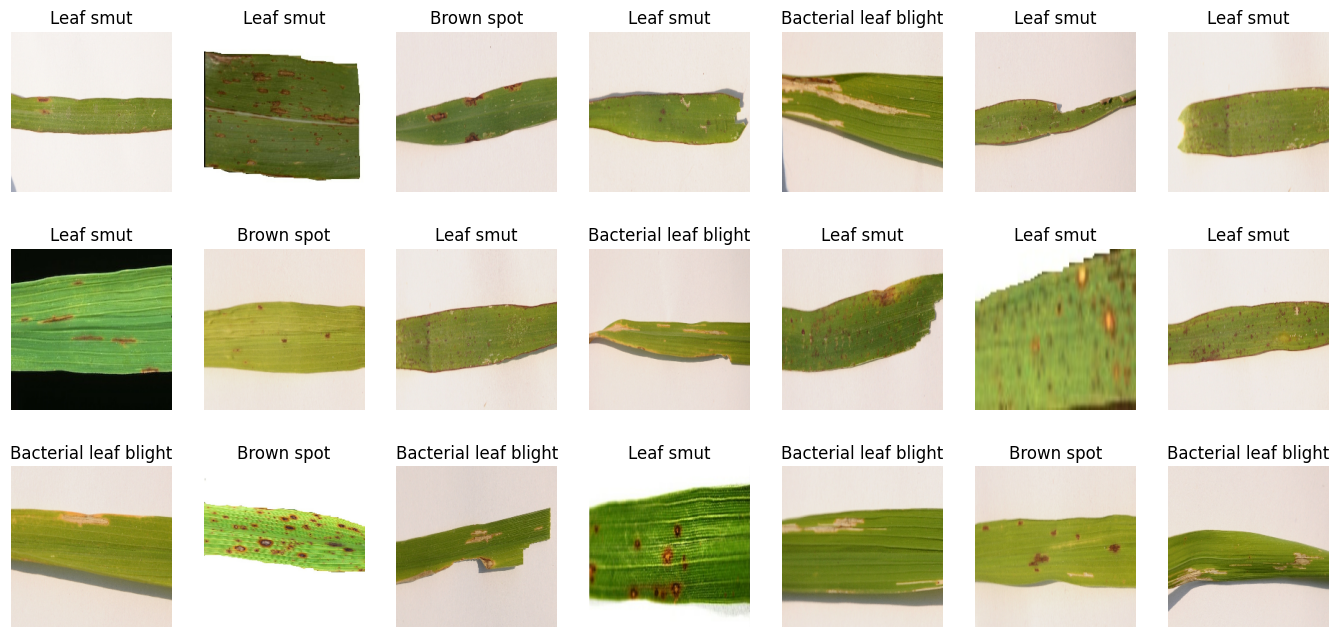

In [ ]:
#Sample images from the given data
plt.figure(figsize=(17,8))
for image_batch, label_batch in dataset.take(1):
  for i in range(21):
    plt.subplot(3,7,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

#### Now lets split data into train and test

In [ ]:
#I will use split-folders library to split data into folders of train and test and store these folder in Riceleafdata folder
#!pip install split-folders
#import splitfolders
#input_folder='/content/drive/MyDrive/Data'
#splitfolders.ratio(input_folder, output='/content/drive/MyDrive/Riceleafdata',
#                   seed=42,ratio=(.8, .2),
#                   group_prefix=None)
#I now have train and test data in my drive

Copying files: 119 files [00:52,  2.28 files/s]


In [ ]:
#From test we will now look at each images in every classes

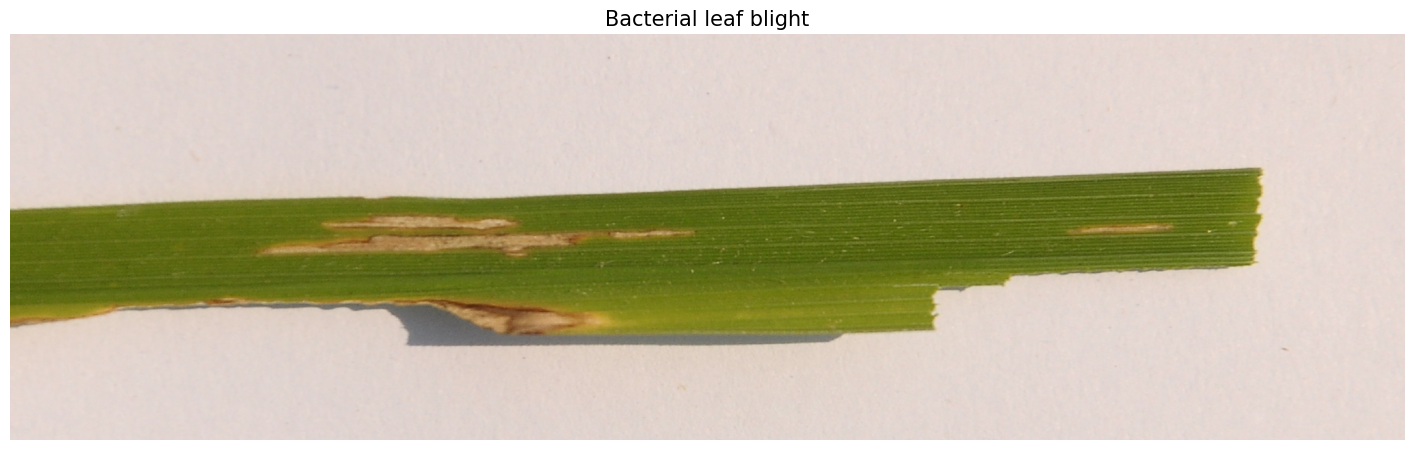

In [ ]:
plt.figure(figsize=(18,10))
bacterial_blight = plt.imread('/content/drive/MyDrive/Riceleafdata/test/Bacterial leaf blight/DSC_0366.jpg')
img = plt.imshow(bacterial_blight)
plt.title('Bacterial leaf blight', fontsize= 15)
plt.axis("off")
plt.show()

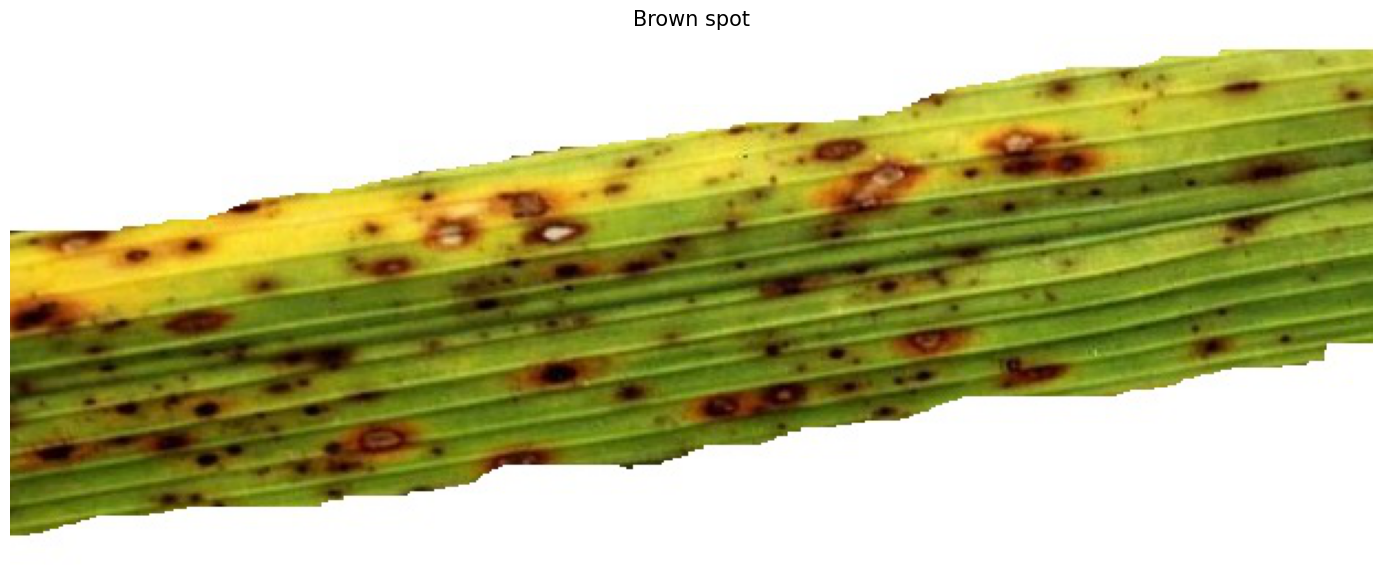

In [ ]:
plt.figure(figsize=(18,7))
brown_spot = plt.imread('/content/drive/MyDrive/Riceleafdata/test/Brown spot/DSC_0101.jpg')
img = plt.imshow(brown_spot)
plt.title('Brown spot', fontsize= 15)
plt.axis("off")
plt.show()

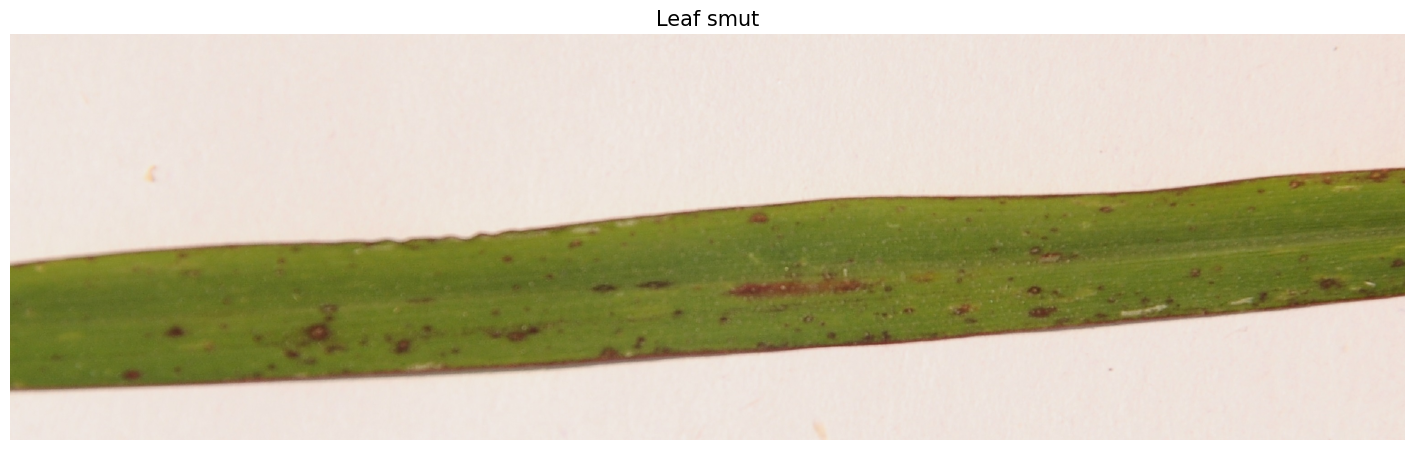

In [ ]:
plt.figure(figsize=(18,10))
leaf_smut = plt.imread('/content/drive/MyDrive/Riceleafdata/test/Leaf smut/DSC_0308.JPG')
img = plt.imshow(leaf_smut)
plt.title('Leaf smut', fontsize= 15)
plt.axis("off")
plt.show()

# Data Augmentation

In [5]:
#Generating more images from existing images
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True, vertical_flip = True, 
                                        rotation_range=10,
                                        width_shift_range = 0.2, height_shift_range= 0.2,
                                        brightness_range = [0.2,1.2])
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [54]:
#This will pull data from train folder and make duplicates with some modifications refering in train_datagenerator 
train_data = train_datagenerator.flow_from_directory('/content/drive/MyDrive/Riceleafdata/train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 95 images belonging to 3 classes.


In [53]:
#This will pull data from test folder and make duplicates with some modifications refering in test_datagenerator 
test_data = test_datagenerator.flow_from_directory('/content/drive/MyDrive/Riceleafdata/test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 24 images belonging to 3 classes.


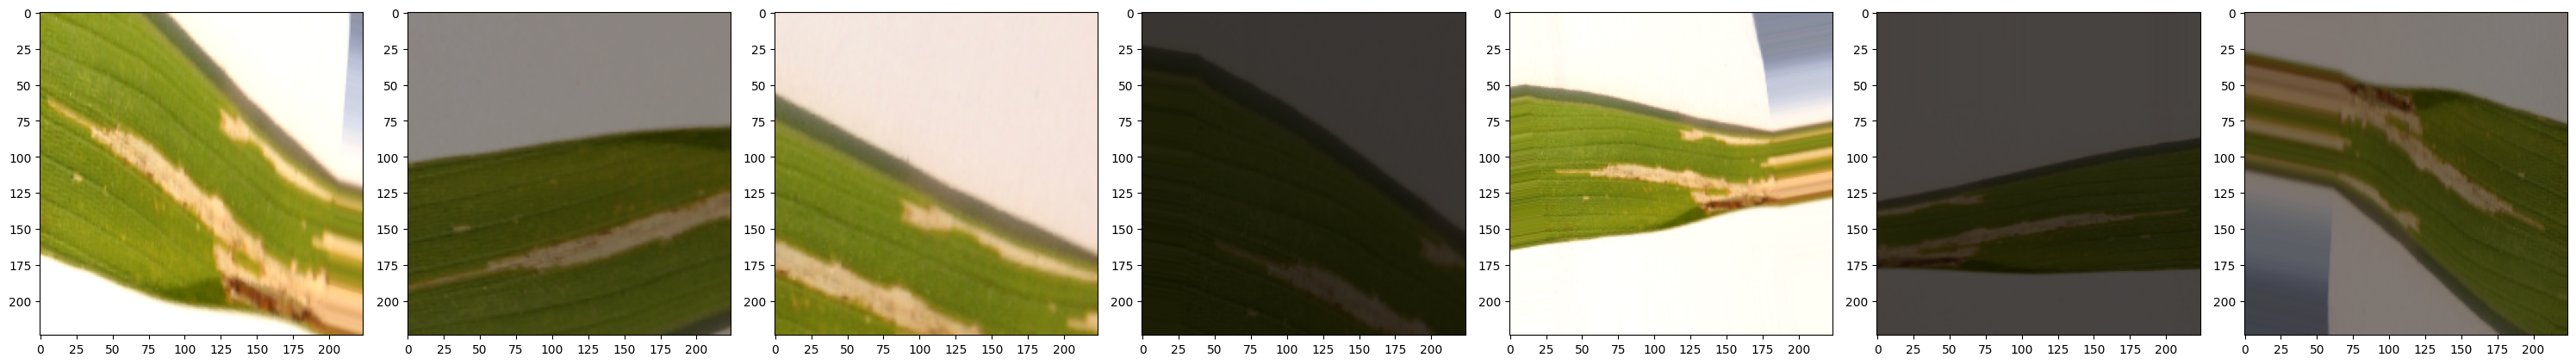

In [56]:
#Visualising test image to see how they look, object oriented ploting using matplotlib
def plotImages(images_arr):    
    fig, axes = plt.subplots(1, 7, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)   
    plt.tight_layout()
    plt.show()
    
images = [train_data[0][0][0] for i in range(7)]
plotImages(images)
#This is how it make changes to each image in training model for better result

#### We will use CNN and two transfer learning techniques inceptionv3 and restnet50V2 for training neural network.

# CNN

In [ ]:
#Creating CNN model from Scratch
cnn = Sequential() 
#Convolution 
cnn.add(Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling (#feature extraction layer)
cnn.add(MaxPool2D(pool_size=2,strides=2))
#Convolution
cnn.add(Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#Pooling
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.3))
#Flaterning
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu')) #THIS LAYER IS THE FULLY CONNECTED LAYER
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.3))
#Output layer
cnn.add(Dense(units=3,activation='softmax')) #THIS IS THES OUTPUT LAYER ,WITH ACTIVATION FUNCTION AS SOFTMAX

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_193 (Conv2D)         (None, 224, 224, 32)      18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_194 (Conv2D)         (None, 112, 112, 16)      4624      
                                                                 
 conv2d_195 (Conv2D)         (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 16)       0         
 g2D)                                                 

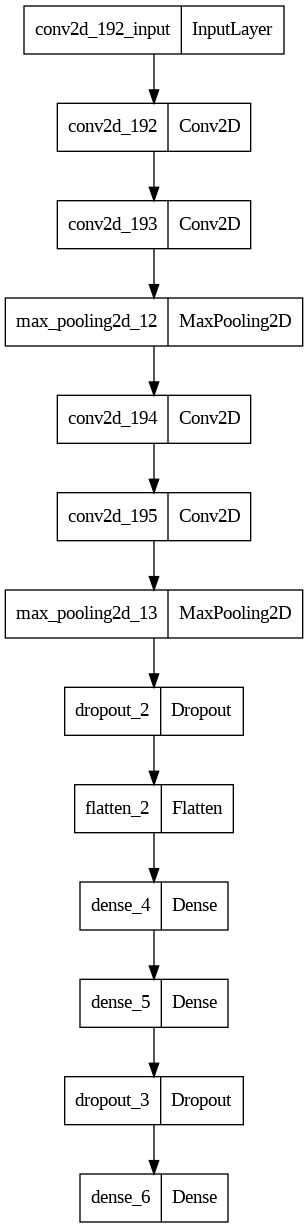

In [ ]:
plot_model(cnn)

In [ ]:
#Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

#Training the model
history = cnn.fit(x = train_data, validation_data = test_data, batch_size = 32, epochs = 300, callbacks=[checkpointer])

Epoch 1/300
3/3 [==============================] - ETA: 0s - loss: 1.1246 - accuracy: 0.3474
Epoch 1: val_loss improved from inf to 1.09341, saving model to model.weights.best.hdf5
3/3 [==============================] - 33s 5s/step - loss: 1.1246 - accuracy: 0.3474 - val_loss: 1.0934 - val_accuracy: 0.2917
Epoch 2/300
3/3 [==============================] - ETA: 0s - loss: 1.1181 - accuracy: 0.2737
Epoch 2: val_loss did not improve from 1.09341
3/3 [==============================] - 5s 2s/step - loss: 1.1181 - accuracy: 0.2737 - val_loss: 1.1154 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - ETA: 0s - loss: 1.0974 - accuracy: 0.3789
Epoch 3: val_loss did not improve from 1.09341
3/3 [==============================] - 5s 2s/step - loss: 1.0974 - accuracy: 0.3789 - val_loss: 1.1042 - val_accuracy: 0.5000
Epoch 4/300
3/3 [==============================] - ETA: 0s - loss: 1.1097 - accuracy: 0.3053
Epoch 4: val_loss did not improve from 1.09341
3/3 [===============

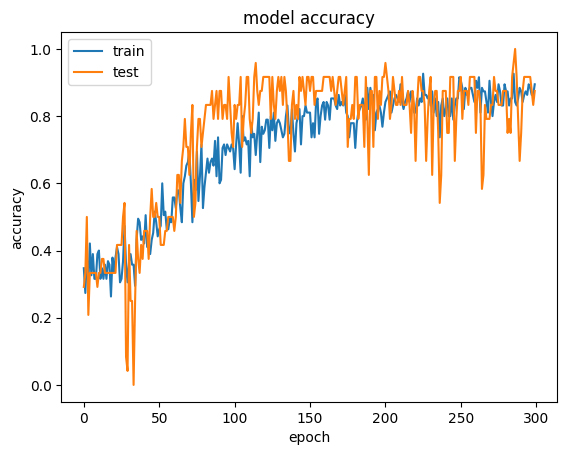

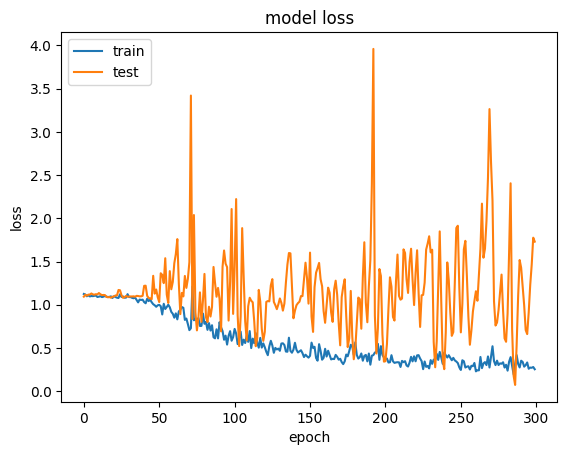

In [ ]:
#This graph will tell the trends in training and test data if there is overfitting etc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Test accuracy score
score = cnn.evaluate(test_data, verbose=0)
accuracy = 100*score[1]

#Print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5000%


In [3]:
#Early stopping will reduce time complexity and make model efficient
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
#Training the model
history = cnn.fit(x = train_data, validation_data = test_data, batch_size = 32, epochs = 300, callbacks=early_stopping)

Epoch 1/300
3/3 [==============================] - 5s 2s/step - loss: 0.1732 - accuracy: 0.9474 - val_loss: 1.2803 - val_accuracy: 0.9167
Epoch 2/300
3/3 [==============================] - 5s 2s/step - loss: 0.1872 - accuracy: 0.9368 - val_loss: 0.9891 - val_accuracy: 0.8750
Epoch 3/300
3/3 [==============================] - 5s 2s/step - loss: 0.2721 - accuracy: 0.8737 - val_loss: 1.3601 - val_accuracy: 0.8333
Epoch 4/300
3/3 [==============================] - 7s 3s/step - loss: 0.2975 - accuracy: 0.9053 - val_loss: 2.2759 - val_accuracy: 0.8750
Epoch 5/300
3/3 [==============================] - 5s 2s/step - loss: 0.2990 - accuracy: 0.8421 - val_loss: 2.3539 - val_accuracy: 0.7917
Epoch 6/300
3/3 [==============================] - 6s 2s/step - loss: 0.2524 - accuracy: 0.9053 - val_loss: 0.9344 - val_accuracy: 0.8333
Epoch 7/300
3/3 [==============================] - 5s 2s/step - loss: 0.3493 - accuracy: 0.8421 - val_loss: 0.4012 - val_accuracy: 0.9167
Epoch 8/300
3/3 [=================

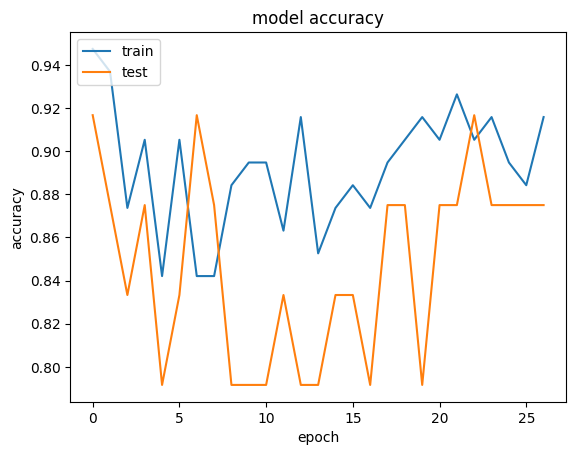

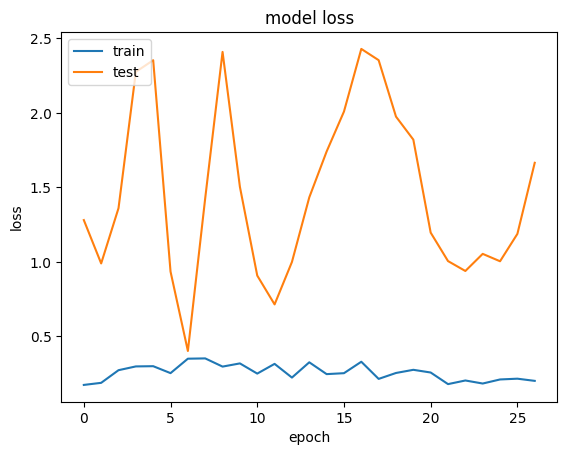

In [ ]:
#This graph will tell the trends in training and test data if there is overfitting etc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#test accuracy score
score = cnn.evaluate(test_data, verbose=0)
accuracy = 100*score[1]

#print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5000%


In [ ]:
#Using earlystopping and without using earlystopping on same cnn model gave same score, so we will be using earlystopping.
#Early stopping reduces time complexity and increases efficiency so i will be using earlystopping in transfer learning as well.  

In [8]:
#This model we will be using for prediction
cnn = Sequential() 
#Convolution and pooling (#feature extraction layer)
cnn.add(Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Conv2D(filters=128,padding = "same",kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Dropout(0.3))
#Flatenning
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu')) #THIS LAYER IS THE FULLY CONNECTED LAYER(1 hidden layer)
cnn.add(Dropout(0.3))
cnn.add(Dense(units=128, activation='relu')) #2 hidden layer
cnn.add(Dropout(0.3))
#Output layer
cnn.add(Dense(3, activation='softmax')) #THIS IS THES OUTPUT LAYER ,WITH ACTIVATION FUNCTION AS SOFTMAX

#Compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#Training the model
history = cnn.fit(x = train_data, validation_data = test_data, batch_size = 32, epochs = 300, callbacks=early_stopping)

Epoch 1/300
3/3 [==============================] - 68s 27s/step - loss: 1.1248 - accuracy: 0.3368 - val_loss: 1.0905 - val_accuracy: 0.3333
Epoch 2/300
3/3 [==============================] - 4s 2s/step - loss: 1.0962 - accuracy: 0.3789 - val_loss: 1.0909 - val_accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 6s 2s/step - loss: 1.0978 - accuracy: 0.3158 - val_loss: 1.0768 - val_accuracy: 0.4583
Epoch 4/300
3/3 [==============================] - 4s 2s/step - loss: 1.0843 - accuracy: 0.3684 - val_loss: 1.0659 - val_accuracy: 0.3333
Epoch 5/300
3/3 [==============================] - 6s 2s/step - loss: 1.0984 - accuracy: 0.3368 - val_loss: 1.0338 - val_accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 4s 2s/step - loss: 1.0816 - accuracy: 0.3263 - val_loss: 0.9809 - val_accuracy: 0.3333
Epoch 7/300
3/3 [==============================] - 5s 2s/step - loss: 1.0845 - accuracy: 0.3684 - val_loss: 0.9121 - val_accuracy: 0.3333
Epoch 8/300
3/3 [===============

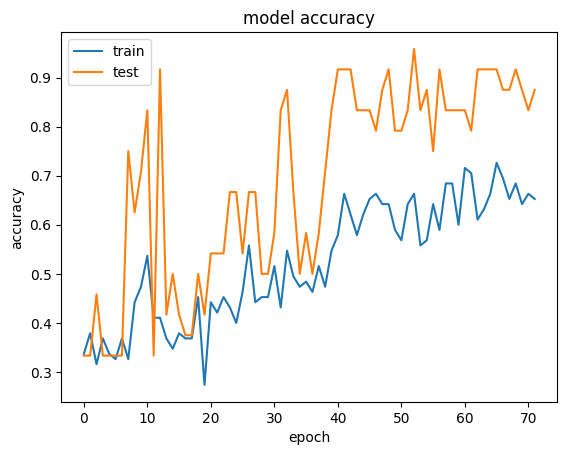

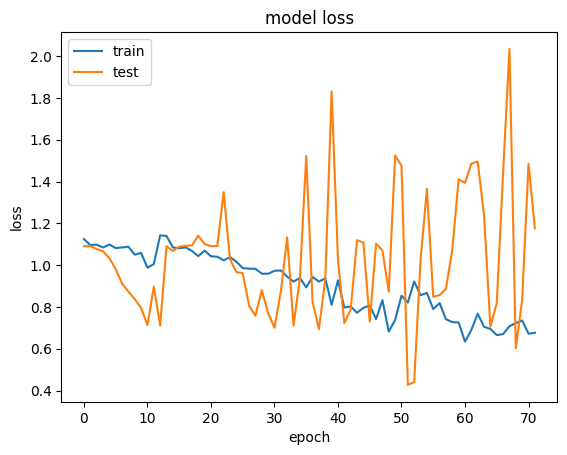

In [9]:
#This graph will tell the trends in training and test data if there is overfitting etc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#test accuracy score
score = cnn.evaluate(test_data, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5000%


In [14]:
#Testing model by giving input image 
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Bacterial leaf blight/DSC_0366.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.64471424
Bacterial leaf blight


In [16]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Brown spot/DSC_0101.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.6245357
Brown spot


In [17]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Leaf smut/DSC_0308.JPG', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.5921529
Leaf smut


# Inceptionv3

In [18]:
#Not including top layer as it is trained on 1000 of output classes and here there are three classes
inception = InceptionV3(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
inception.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 alization)           

In [20]:
#For loop freezes the pretrained structure
for layer in inception.layers:
    layer.trainable = False
flatten_layer = Flatten()(inception.output)
output_layer = Dense(len(class_names),activation = 'softmax')(flatten_layer)
inception_model = Model(inputs = inception.input,outputs = output_layer)
inception_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 alization)                     )                                                             

In [35]:
#Compiling the model
inception_model.compile(loss= 'categorical_crossentropy',
                   optimizer = 'Adam',
                   metrics = ['accuracy'])
#Training the model
history = inception_model.fit(train_data,validation_data= test_data,epochs = 100,
                                   steps_per_epoch=len(train_data),validation_steps=len(test_data), callbacks=early_stopping)

Epoch 1/100
3/3 [==============================] - 11s 3s/step - loss: 1.8456 - accuracy: 0.8316 - val_loss: 4.2138 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 6s 2s/step - loss: 1.7471 - accuracy: 0.7895 - val_loss: 3.8782 - val_accuracy: 0.5833
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.9460 - accuracy: 0.9158 - val_loss: 1.8010 - val_accuracy: 0.8333
Epoch 4/100
3/3 [==============================] - 6s 2s/step - loss: 1.7564 - accuracy: 0.8526 - val_loss: 1.7655 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 0.8299 - accuracy: 0.8947 - val_loss: 2.1857 - val_accuracy: 0.8333
Epoch 6/100
3/3 [==============================] - 4s 2s/step - loss: 1.1548 - accuracy: 0.8947 - val_loss: 2.1007 - val_accuracy: 0.8333
Epoch 7/100
3/3 [==============================] - 6s 2s/step - loss: 0.4527 - accuracy: 0.9368 - val_loss: 2.2755 - val_accuracy: 0.7917
Epoch 8/100
3/3 [================

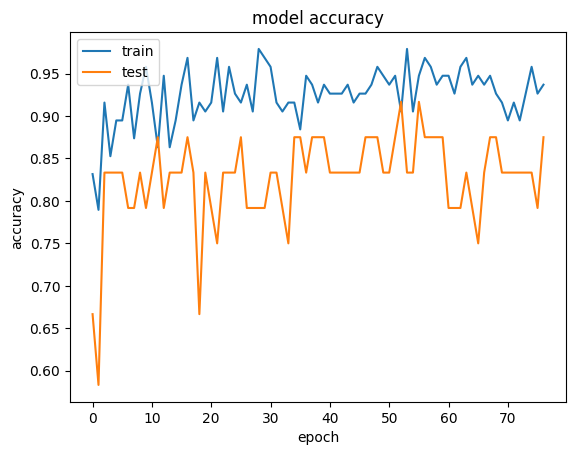

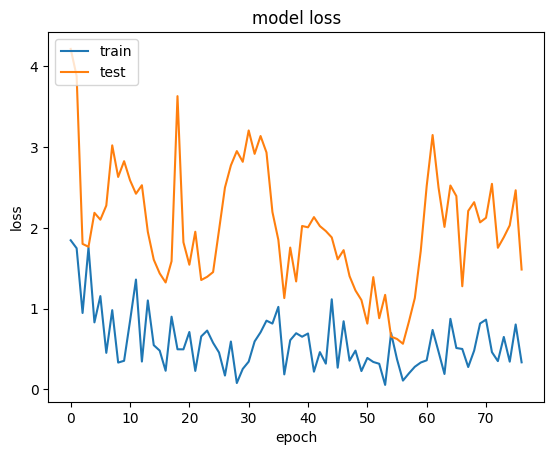

In [36]:
#This graph will tell the trends in training and test data if there is overfitting etc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
#test accuracy score
score = inception_model.evaluate(test_data, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5000%


In [38]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Bacterial leaf blight/DSC_0366.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = inception_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:1.0
Bacterial leaf blight


In [39]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Brown spot/DSC_0101.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = inception_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.999703
Leaf smut


In [40]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Leaf smut/DSC_0308.JPG', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = inception_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:1.0
Leaf smut


# Resnet50

In [41]:
#Not including top layer as it is trained on 1000 of output classes and here there are three classes
resnet = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_8[0][0]']               
 alization)                     )                                                      

In [42]:
#For loop freezes the pretrained structure
for layer in resnet.layers:
    layer.trainable = False
flatten_layer = Flatten()(resnet.output)
output_layer = Dense(len(class_names),activation = 'softmax')(flatten_layer)
resnet_model = Model(inputs = resnet.input,outputs = output_layer)
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [43]:
#Compiling the model
resnet_model.compile(loss= 'categorical_crossentropy',
                   optimizer = 'Adam',
                   metrics = ['accuracy'])
#Training the model
history = resnet_model.fit(train_data,validation_data= test_data,epochs = 100,
                                   steps_per_epoch=len(train_data),validation_steps=len(test_data), callbacks=early_stopping)

Epoch 1/100
3/3 [==============================] - 10s 3s/step - loss: 4.3708 - accuracy: 0.3684 - val_loss: 4.2266 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 1.9584 - accuracy: 0.7263 - val_loss: 0.5124 - val_accuracy: 0.8750
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 2.1599 - accuracy: 0.7053 - val_loss: 0.0399 - val_accuracy: 0.9583
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 0.7852 - accuracy: 0.8632 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 1.0164 - accuracy: 0.8632 - val_loss: 0.3085 - val_accuracy: 0.9167
Epoch 6/100
3/3 [==============================] - 6s 2s/step - loss: 1.0081 - accuracy: 0.8632 - val_loss: 0.4352 - val_accuracy: 0.9167
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 0.8777 - accuracy: 0.8632 - val_loss: 0.2475 - val_accuracy: 0.9167
Epoch 8/100
3/3 [================

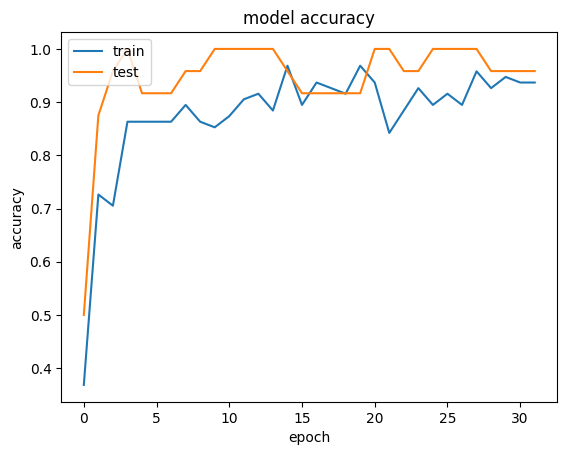

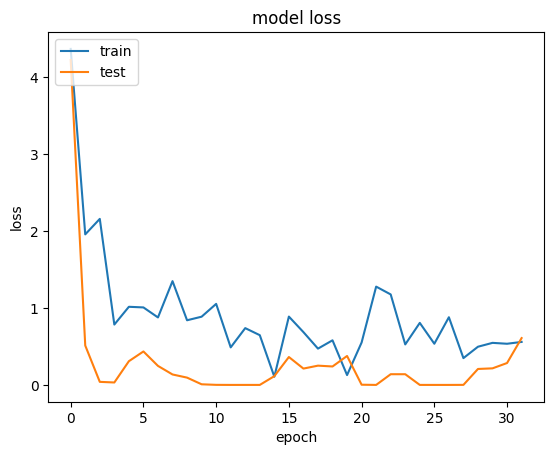

In [44]:
#This graph will tell the trends in training and test data if there is overfitting etc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#test accuracy score
score = resnet_model.evaluate(test_data, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 95.8333%


In [47]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Bacterial leaf blight/DSC_0366.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:1.0
Bacterial leaf blight


In [48]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Brown spot/DSC_0101.jpg', target_size = (224,224))
test_image = img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.99999976
Brown spot


In [49]:
#Testing model by giving input image
test_image = load_img('/content/drive/MyDrive/Riceleafdata/test/Leaf smut/DSC_0308.JPG', target_size = (224,224))
test_image = img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image, verbose=0)
print("probability:"+str(np.max(result))+"\n"+class_names[result.argmax()])

probability:0.9999999
Leaf smut


#### Resnet is best performing model

**Give Feedback**: @zuhairahmed990@gmail.com